# Clustering using all features 

##  Importing important packages and libraries

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/AustinEVupdatedgeoapiev_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Station Name,Address 1,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Port 1: Connector Type,...,New Georeferenced Column,Pricing,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,url
0,COA FLEET - PIE / BARTON #2,505 Barton Springs Rd,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,J1772,...,"30.256936, -97.749284",$4.17/month PIE members $2/hr Non-Members,40A,30.256936,-97.749284,20,0,20,20,"https://www.google.com/maps/place/30.256936, -..."
1,COA FLEET - PIE / ROOF 2,625 E 10th St,Austin,Texas,78701,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,NEMA 5-20R,...,"30.2696, -97.73477",$4.17/month PIE members $2/hr Non-Members,40A,30.269600,-97.734770,20,2,17,20,"https://www.google.com/maps/place/30.2696, -97..."
2,HPI 3700 / 3900 SC 4,3900 N Capital of Texas Hwy,Austin,Texas,78746,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,...,"30.337935, -97.808041",$4.17/month PIE members $2/hr Non-Members,40A,30.337935,-97.808041,3,0,0,6,"https://www.google.com/maps/place/30.337935, -..."
3,HPE AUSTIN / TXN04 A,14231 Tandem Blvd,Austin,Texas,78728,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,...,"30.445476, -97.690074",$4.17/month PIE members $2/hr Non-Members,40A,30.445476,-97.690074,1,0,8,17,"https://www.google.com/maps/place/30.445476, -..."
4,NATIONAL INSTRU / 5&6,11500 N Mopac Expy,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,...,"30.408705, -97.725377",$4.17/month PIE members $2/hr Non-Members,40A,30.408705,-97.725377,20,0,7,20,"https://www.google.com/maps/place/30.408705, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NATIONAL INSTRU / 3&4,11500 N Mopac Expy,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,...,"30.408744, -97.725343",$4.17/month PIE members $2/hr Non-Members,40A,30.408744,-97.725343,20,0,7,20,"https://www.google.com/maps/place/30.408744, -..."
443,PIE AE / PUBGABLESPRESS2,507 Pressler St,Austin,Texas,78703,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Parking,J1772,...,"30.273037, -97.759986",$4.17/month PIE members $2/hr Non-Members,40A,30.273037,-97.759986,20,0,20,20,"https://www.google.com/maps/place/30.273037, -..."
444,WEINSTEIN / 3 FIVE,8003 S IH 35 Frontage Rd,Austin,Texas,78744,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Multifamily Commercial,J1772,...,"30.172599, -97.777067",$4.17/month PIE members $2/hr Non-Members,40A,30.172599,-97.777067,8,0,3,12,"https://www.google.com/maps/place/30.172599, -..."
445,COA FLEET - PIE / RUTHERFORD #3,1520 Rutherford Ln,Austin,Texas,78754,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Parking,J1772,...,"30.337732, -97.680766",$4.17/month PIE members $2/hr Non-Members,40A,30.337732,-97.680766,5,1,4,18,"https://www.google.com/maps/place/30.337732, -..."


In [3]:
print("\nData size :",df.shape)
print("\nNumber of records :",len(df))
print("\nNumber of atrributes :",len(df.columns))
print("\nDataset Information :", df.info())
df.describe()


Data size : (447, 22)

Number of records : 447

Number of atrributes : 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station Name              447 non-null    object 
 1   Address  1                447 non-null    object 
 2   City                      447 non-null    object 
 3   State                     447 non-null    object 
 4   Postal Code               447 non-null    int64  
 5   No. of Ports              447 non-null    int64  
 6   Pricing Policy            447 non-null    object 
 7   Usage Access              447 non-null    object 
 8   Category                  447 non-null    object 
 9   Port 1: Connector Type    447 non-null    object 
 10  Voltage (V)               447 non-null    object 
 11  Port 2: Connector Type    447 non-null    object 
 12  New Georeferenced Column  447 non-null    obj

,Postal Code,No. of Ports,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,78726.581655,1.932886,30.303832,-97.749155,12.125280,0.570470,8.474273,16.015660
std,22.624482,0.250500,0.072054,0.058258,6.804935,0.905304,7.203863,5.934034
min,78613.000000,1.000000,30.147634,-97.967673,0.000000,0.000000,0.000000,0.000000
25%,78702.000000,2.000000,30.259394,-97.774755,6.000000,0.000000,2.000000,12.000000
50%,78729.000000,2.000000,30.275229,-97.744761,11.000000,0.000000,6.000000,20.000000
75%,78746.000000,2.000000,30.337933,-97.714914,20.000000,1.000000,17.000000,20.000000
max,78759.000000,2.000000,30.479716,-97.639587,20.000000,9.000000,20.000000,20.000000


In [4]:
#Checking the null values again
new_null_val = pd.DataFrame({'Null Values' : df.isna().sum(), 
                             'Percentage Null Values' : (df.isna().sum()) / len(df) * (100)})
new_null_val

,Null Values,Percentage Null Values
Station Name,0,0.0
Address 1,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
No. of Ports,0,0.0
Pricing Policy,0,0.0
Usage Access,0,0.0
Category,0,0.0
Port 1: Connector Type,0,0.0


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 8


,Postal Code,No. of Ports,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count
0,78704,2,30.256936,-97.749284,20,0,20,20
1,78701,2,30.269600,-97.734770,20,2,17,20
2,78746,2,30.337935,-97.808041,3,0,0,6
3,78728,2,30.445476,-97.690074,1,0,8,17
4,78759,2,30.408705,-97.725377,20,0,7,20
...,...,...,...,...,...,...,...,...
442,78759,2,30.408744,-97.725343,20,0,7,20
443,78703,2,30.273037,-97.759986,20,0,20,20
444,78744,2,30.172599,-97.777067,8,0,3,12
445,78754,2,30.337732,-97.680766,5,1,4,18


In [6]:
# displaying the columns of the dataset 
pd.set_option("display.max_columns", None)
df.head(1)

,Station Name,Address 1,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,url
0,COA FLEET - PIE / BARTON #2,505 Barton Springs Rd,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,J1772,240V,J1772,"30.256936, -97.749284",$4.17/month PIE members $2/hr Non-Members,40A,30.256936,-97.749284,20,0,20,20,"https://www.google.com/maps/place/30.256936, -..."


In [7]:
df.columns

Index(['Station Name', 'Address  1', 'City', 'State', 'Postal Code',
       'No. of Ports', 'Pricing Policy', 'Usage Access', 'Category',
       'Port 1: Connector Type', 'Voltage (V)', 'Port 2: Connector Type',
       'New Georeferenced Column', 'Pricing ', 'Power Select', 'latitude',
       'longitude', 'evstations_count', 'hospitals_count', 'parks_count',
       'restaurants_count', 'url'],
      dtype='object')

In [8]:
geo_df = df.copy()

In [9]:
geo_df = geo_df.drop(['New Georeferenced Column','url','Address  1','City','State','Pricing Policy','Pricing '], axis=1)

In [10]:
geo_df

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count
0,COA FLEET - PIE / BARTON #2,78704,2,Commercial with restricted access,Municipal,J1772,240V,J1772,40A,30.256936,-97.749284,20,0,20,20
1,COA FLEET - PIE / ROOF 2,78701,2,Commercial with restricted access,Municipal,NEMA 5-20R,240V,J1772,40A,30.269600,-97.734770,20,2,17,20
2,HPI 3700 / 3900 SC 4,78746,2,Commercial with unrestricted access,Workplace,J1772,240V,J1772,40A,30.337935,-97.808041,3,0,0,6
3,HPE AUSTIN / TXN04 A,78728,2,Commercial with unrestricted access,Workplace,J1772,240V,J1772,40A,30.445476,-97.690074,1,0,8,17
4,NATIONAL INSTRU / 5&6,78759,2,Commercial with unrestricted access,Workplace,J1772,240V,J1772,40A,30.408705,-97.725377,20,0,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NATIONAL INSTRU / 3&4,78759,2,Commercial with unrestricted access,Workplace,J1772,240V,J1772,40A,30.408744,-97.725343,20,0,7,20
443,PIE AE / PUBGABLESPRESS2,78703,2,Commercial with unrestricted access,Parking,J1772,240V,J1772,40A,30.273037,-97.759986,20,0,20,20
444,WEINSTEIN / 3 FIVE,78744,2,Commercial with unrestricted access,Multifamily Commercial,J1772,240V,J1772,40A,30.172599,-97.777067,8,0,3,12
445,COA FLEET - PIE / RUTHERFORD #3,78754,2,Commercial with restricted access,Parking,J1772,240V,J1772,40A,30.337732,-97.680766,5,1,4,18


In [11]:
# Performing label encoding on required features
from sklearn import preprocessing

categ = ['Station Name', 'Usage Access', 
         'Postal Code', 'Category', 'Port 1: Connector Type', 'Voltage (V)',
         'Port 2: Connector Type', 'Power Select']

label_encoder = preprocessing.LabelEncoder()

geo_df[categ] = geo_df[categ].apply(label_encoder.fit_transform)

In [12]:
geo_df

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,237,39,2,1,8,0,1,1,2,30.408744,-97.725343,20,0,7,20
443,345,4,2,1,5,0,1,1,2,30.273037,-97.759986,20,0,20,20
444,435,26,2,1,3,0,1,1,2,30.172599,-97.777067,8,0,3,12
445,92,35,2,0,5,0,1,1,2,30.337732,-97.680766,5,1,4,18


<AxesSubplot:>

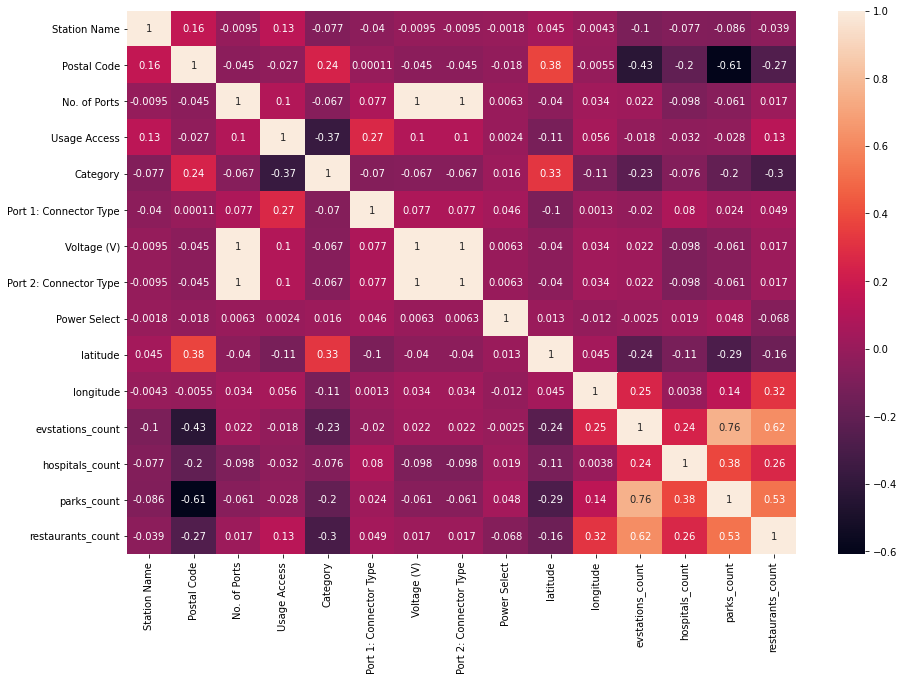

In [13]:
#Correlation matrix
geo_df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(geo_df.corr(), annot = True)

In [14]:
correlation = geo_df.corr()['Category'].abs().sort_values(ascending = False)
correlation

Category                  1.000000
Usage Access              0.365267
latitude                  0.326831
restaurants_count         0.301236
Postal Code               0.239877
evstations_count          0.230896
parks_count               0.198048
longitude                 0.114256
Station Name              0.077029
hospitals_count           0.075701
Port 1: Connector Type    0.069701
Voltage (V)               0.066502
Port 2: Connector Type    0.066502
No. of Ports              0.066502
Power Select              0.016255
Name: Category, dtype: float64

## Clustering using all the Features except target feature


In [15]:
M = geo_df.drop(['Category'], axis=1) #features
N = geo_df['Category'] #target feature

In [16]:
M = M.values

In [17]:
N

0      4
1      4
2      8
3      8
4      8
      ..
442    8
443    5
444    3
445    5
446    1
Name: Category, Length: 447, dtype: int32

For cluster = 1, SSE/WCSS is 7580097.144656601
For cluster = 2, SSE/WCSS is 1996875.7123880892
For cluster = 3, SSE/WCSS is 961717.4996234223
For cluster = 4, SSE/WCSS is 599349.0092273053
For cluster = 5, SSE/WCSS is 428499.41874695785
For cluster = 6, SSE/WCSS is 339487.21479791036
For cluster = 7, SSE/WCSS is 277983.9692988605
For cluster = 8, SSE/WCSS is 243459.98070073893
For cluster = 9, SSE/WCSS is 215855.96338989353
For cluster = 10, SSE/WCSS is 196619.73230280794


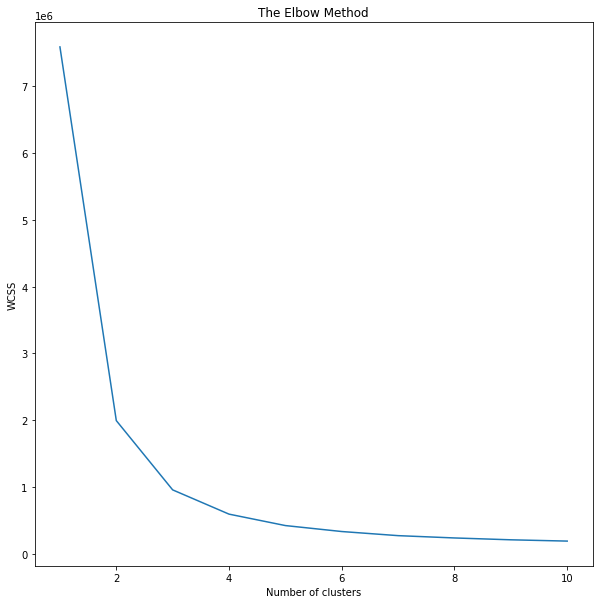

In [18]:
wcss = [] # Within cluster sum of squares (WCSS)
sse = {}

for i in range(1,11):
    model_new_geo = KMeans(n_clusters = i, init = "k-means++")
    model_new_geo.fit(M)
    wcss.append(model_new_geo.inertia_)
    sse[i] = model_new_geo.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))
  
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best K-value (using KneeLocator) utilizing k-means:',kl.elbow)

Best K-value (using KneeLocator) utilizing k-means: 3


In [20]:
centers = np.array(model_new_geo.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++",  max_iter = 50, n_init = 10, random_state = 0)
clustered_data = model.fit_predict(M)

In [21]:
predict_kmeans = model.labels_
print(predict_kmeans)

[0 0 2 2 2 2 0 0 0 2 2 2 2 0 2 0 1 2 0 2 1 2 0 0 0 1 1 0 2 0 2 2 0 2 2 2 1
 1 2 0 1 0 1 0 0 2 1 2 1 1 1 1 0 2 1 1 0 0 2 2 0 2 1 0 0 0 0 2 0 0 1 1 0 0
 2 2 0 0 2 0 1 1 2 2 1 2 1 0 1 0 2 2 0 2 1 1 2 2 0 0 0 2 2 0 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 0 0 1 2 2 1 1 1 0 0 0 0 1 1 1 2 2 0 1 0 1 1 2 2 2 0 2 0 0 1
 2 0 2 2 0 1 0 0 1 2 1 0 2 1 0 0 1 2 0 2 0 1 0 1 0 0 1 0 1 2 1 2 2 1 2 0 1
 1 2 2 2 2 2 1 1 1 0 2 0 2 1 1 0 2 1 2 0 0 1 1 0 0 0 2 2 1 2 2 0 0 0 1 2 1
 0 1 1 0 2 1 1 0 1 0 1 0 0 1 1 0 0 1 2 2 0 1 2 0 2 0 0 2 2 2 1 0 0 0 0 1 2
 1 0 2 2 1 1 1 0 0 0 2 0 2 0 1 0 1 2 1 0 1 2 1 1 2 1 2 0 1 2 0 1 0 1 1 2 0
 2 1 2 1 0 0 1 0 1 2 1 2 1 1 1 0 0 1 0 2 0 0 1 1 1 2 1 1 2 0 1 2 1 0 2 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 2 0 1 0 1 1 1 0 1 2 1 2 1 2 1 1 0 0 2 1 2 0
 1 2 2 2 1 2 2 2 1 1 2 1 2 1 1 2 1 0 0 2 2 2 1 1 0 0 2 0 2 2 0 2 0 0 2 0 1
 1 1 2 1 1 2 2 2 0 1 2 1 0 2 0 2 2 2 1 1 1 1 2 0 1 1 1 0 2 1 0 2 2 2 0 2 1
 1 0 0]


In [22]:
# Frequency count of the Output clusters
unique, counts = np.unique(predict_kmeans, return_counts=True)
print('Unique sample counts per cluster:', dict(zip(unique, counts)))

Unique sample counts per cluster: {0: 148, 1: 150, 2: 149}


## Cluster Analysis


In [23]:
#Append the prediction 
geo_df["Clusters"] = clustered_data
print("Clusters Assigned : \n")
geo_df.head()

Clusters Assigned : 



,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20,0
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20,0
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6,2
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17,2
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20,2


In [24]:
mapping = {0:'Dense', 1:'Normal', 2:'Sparse'}

In [25]:
clus_type = geo_df[['Clusters']]
clus_type['cluster_type'] = clus_type['Clusters'].replace(mapping)

In [26]:
geo_df['cluster_type'] = clus_type['cluster_type']

In [27]:
geo_df.head()

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters,cluster_type
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20,0,Dense
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20,0,Dense
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6,2,Sparse
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17,2,Sparse
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20,2,Sparse


In [28]:
geo_df_cluster_new = geo_df.groupby(['Clusters'])
geo_df_cluster_new.mean()

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count
Clusters,,,,,,,,,,,,,,,
0,73.5,14.02027,1.972973,1.081081,5.445946,0.114865,0.972973,0.972973,1.972973,30.288485,-97.748102,13.195946,0.709459,9.304054,16.162162
1,371.5,19.06000,1.960000,1.373333,4.866667,0.086667,0.960000,0.960000,1.966667,30.296627,-97.752178,11.693333,0.553333,8.093333,16.133333
2,222.0,18.04698,1.865772,1.040268,5.859060,0.026846,0.865772,0.865772,1.973154,30.326329,-97.747157,11.496644,0.449664,8.033557,15.751678


In [29]:
geo_df

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters,cluster_type
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20,0,Dense
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20,0,Dense
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6,2,Sparse
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17,2,Sparse
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20,2,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,237,39,2,1,8,0,1,1,2,30.408744,-97.725343,20,0,7,20,2,Sparse
443,345,4,2,1,5,0,1,1,2,30.273037,-97.759986,20,0,20,20,1,Normal
444,435,26,2,1,3,0,1,1,2,30.172599,-97.777067,8,0,3,12,1,Normal
445,92,35,2,0,5,0,1,1,2,30.337732,-97.680766,5,1,4,18,0,Dense


In [30]:
# Checking unique value of 'cluster_type'
geo_df['cluster_type'].value_counts()

Normal    150
Sparse    149
Dense     148
Name: cluster_type, dtype: int64

In [31]:
geo_df1 = geo_df.copy()

In [32]:
geo_df1

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters,cluster_type
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20,0,Dense
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20,0,Dense
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6,2,Sparse
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17,2,Sparse
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20,2,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,237,39,2,1,8,0,1,1,2,30.408744,-97.725343,20,0,7,20,2,Sparse
443,345,4,2,1,5,0,1,1,2,30.273037,-97.759986,20,0,20,20,1,Normal
444,435,26,2,1,3,0,1,1,2,30.172599,-97.777067,8,0,3,12,1,Normal
445,92,35,2,0,5,0,1,1,2,30.337732,-97.680766,5,1,4,18,0,Dense


In [33]:
geo_df1 = geo_df1.drop(['Station Name','Postal Code','latitude','longitude'], axis=1)
geo_df1

,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters,cluster_type
0,2,0,4,0,1,1,2,20,0,20,20,0,Dense
1,2,0,4,1,1,1,2,20,2,17,20,0,Dense
2,2,1,8,0,1,1,2,3,0,0,6,2,Sparse
3,2,1,8,0,1,1,2,1,0,8,17,2,Sparse
4,2,1,8,0,1,1,2,20,0,7,20,2,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2,1,8,0,1,1,2,20,0,7,20,2,Sparse
443,2,1,5,0,1,1,2,20,0,20,20,1,Normal
444,2,1,3,0,1,1,2,8,0,3,12,1,Normal
445,2,0,5,0,1,1,2,5,1,4,18,0,Dense


In [34]:
geo_df1_clus = geo_df1.groupby(['Clusters'])
geo_df1_clus.mean()

,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,evstations_count,hospitals_count,parks_count,restaurants_count
Clusters,,,,,,,,,,,
0,1.972973,1.081081,5.445946,0.114865,0.972973,0.972973,1.972973,13.195946,0.709459,9.304054,16.162162
1,1.960000,1.373333,4.866667,0.086667,0.960000,0.960000,1.966667,11.693333,0.553333,8.093333,16.133333
2,1.865772,1.040268,5.859060,0.026846,0.865772,0.865772,1.973154,11.496644,0.449664,8.033557,15.751678


## Saving the dataset into a CSV file 

In [35]:
geo_df1.to_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/Austin_clustered_data.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully


**I have done Clustering using all the features on the dataset found the optimal value of ‘k’ using ‘Elbow Method’ & ‘kneed’ library which was found to be ‘3’. Later, I have analyzed the clusters & clustered the dataset into ‘Dense’, ‘Sparse’ & ‘Normal’ groups according to No. of Ports, Usage Access, Category, Port 1: Connector Type, Voltage (V), Port 2: Connector Type, Power Select, evstations_count, hospitals_count, parks_count & restaurants_count. We can further make a prediction models based on this using all the features except Clusters as 'Feature variable' & Clusters as 'Target variable'**

## Features which can be used for 'Boosting' & other Supervised ML Models

In [36]:
geo_df2 = geo_df.copy()

In [37]:
geo_df2

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,latitude,longitude,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters,cluster_type
0,76,5,2,0,4,0,1,1,2,30.256936,-97.749284,20,0,20,20,0,Dense
1,85,2,2,0,4,1,1,1,2,30.269600,-97.734770,20,2,17,20,0,Dense
2,201,28,2,1,8,0,1,1,2,30.337935,-97.808041,3,0,0,6,2,Sparse
3,196,15,2,1,8,0,1,1,2,30.445476,-97.690074,1,0,8,17,2,Sparse
4,238,39,2,1,8,0,1,1,2,30.408705,-97.725377,20,0,7,20,2,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,237,39,2,1,8,0,1,1,2,30.408744,-97.725343,20,0,7,20,2,Sparse
443,345,4,2,1,5,0,1,1,2,30.273037,-97.759986,20,0,20,20,1,Normal
444,435,26,2,1,3,0,1,1,2,30.172599,-97.777067,8,0,3,12,1,Normal
445,92,35,2,0,5,0,1,1,2,30.337732,-97.680766,5,1,4,18,0,Dense


In [38]:
geo_df2 = geo_df2.drop(['cluster_type','latitude','longitude'], axis=1)
geo_df2

,Station Name,Postal Code,No. of Ports,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,Power Select,evstations_count,hospitals_count,parks_count,restaurants_count,Clusters
0,76,5,2,0,4,0,1,1,2,20,0,20,20,0
1,85,2,2,0,4,1,1,1,2,20,2,17,20,0
2,201,28,2,1,8,0,1,1,2,3,0,0,6,2
3,196,15,2,1,8,0,1,1,2,1,0,8,17,2
4,238,39,2,1,8,0,1,1,2,20,0,7,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,237,39,2,1,8,0,1,1,2,20,0,7,20,2
443,345,4,2,1,5,0,1,1,2,20,0,20,20,1
444,435,26,2,1,3,0,1,1,2,8,0,3,12,1
445,92,35,2,0,5,0,1,1,2,5,1,4,18,0


## Saving the dataset into a CSV file 

In [39]:
geo_df2.to_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/Austin_supervisedml_dataset.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully
